The data in the dataset is of different faces. We imported the dataset and then loaded the dataset. We made a variable for the dataset called load_olivetti. The load_olivetti variable contains data, target, and DESCR.
data = has information about every pixel for every image, has 400 images
image dimensions = 64 x 64
4096 pixels per image
flatten the image
40 people were photographed 10 times each
target = number represents the person, and each person has 10 photos (so 10 of their number)
DESCR = description

In [140]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [104]:
print("hi")

hi


In [105]:
load_olivetti = fetch_olivetti_faces()

In [106]:
print(load_olivetti)

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32), 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17

In [107]:
first_picture = load_olivetti.data[0]

In [108]:
load_olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [109]:
load_olivetti.DESCR

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    ======

In [110]:
print(first_picture.shape)

(4096,)


In [111]:
data = load_olivetti.data
target = load_olivetti.target


In [112]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=.2, random_state=9)

In [113]:
for train_and_val_index, test_index in sss.split(data, target): 
    data_train_and_val= data[train_and_val_index]
    data_test = data[test_index]
    target_train_and_val = target[train_and_val_index]
    target_test = target[test_index]
    

for train_index, val_index in sss.split(data_train_and_val, target_train_and_val): 
    data_train= data[train_index]
    data_val = data[val_index]
    target_train = target[train_index]
    target_val = target[val_index]
    
print(data_train)


[[0.5206612  0.5206612  0.53305787 ... 0.46694216 0.43801653 0.43801653]
 [0.20661157 0.2768595  0.3553719  ... 0.30991736 0.37190083 0.38429752]
 [0.6570248  0.677686   0.6983471  ... 0.11570248 0.11570248 0.10330579]
 ...
 [0.7107438  0.74793386 0.76859504 ... 0.39256197 0.47933885 0.7107438 ]
 [0.47933885 0.5495868  0.6280992  ... 0.2231405  0.21900827 0.22727273]
 [0.41735536 0.47107437 0.59504133 ... 0.14876033 0.15289256 0.20661157]]


In [114]:
print(data_train.shape)
print(data_val.shape)
print(data_test.shape)

(256, 4096)
(64, 4096)
(80, 4096)


In [115]:
print(data_train[0])


[0.5206612  0.5206612  0.53305787 ... 0.46694216 0.43801653 0.43801653]


In [153]:
from sklearn.cluster import KMeans
k = 120
kmeans = KMeans(n_clusters=k)
target_pred = kmeans.fit_predict(data_train)

In [117]:
print(target_pred)



[10  7  8 24  2 16  4  5 19 10 22 24  6  9 30  7 38 15 12  1  3 10 16 26
 21 23 24 26  8 20  3  0 30 17 23 21  8  8  6 10 39 22 36  5 31 26 25  5
  7 35  6 32 26 11 34 34  9 15 10  2 15  4  7  6 16 36 12 18 18 23 17 16
 27 17 33 19 39  7  6  6 14 16 13 38  4 32 34 24 25 14 22 19 39  6 36 10
 26  6 19 26  8  9 20  5 17 17  1 23 10 27 31  2 22 29  7 23 34  0  5 24
 14 35 30 20 23 11 27 32 27 16 31  8 18  5 32 16 32  6 26 28  0 11  5 17
 10  0 12  6 28 15  2 27 17 14 17 21  9 36 28 10 17  6  1 34 24  2  4 34
 13 37 29 16 38 20 29  6 39 39 36 19 26 37 24  6 18  5 16 12 34 20 28 15
  8 24  9 30  4 18  7 19 27 36 22 29 38 17  6 21 36 16  6 17 37 25 12 36
 19 13 31 17 19  9  7 36 12  7  6  5 26 37 36 33 17 10 20 39 22 24  0 11
 23 33  5 17 17  1 11  0  8 11 13 39 32 35 25 20]


In [118]:

print(len(target_pred))

256


In [119]:
#printing one picture
first_picture_train = data_train[0]

In [120]:
# reshape array

first_picture_train_reshaped = first_picture_train.reshape(64, 64)
print(first_picture_train_reshaped)


[[0.5206612  0.5206612  0.53305787 ... 0.60330576 0.59090906 0.5371901 ]
 [0.5082645  0.5123967  0.5165289  ... 0.59090906 0.5661157  0.5371901 ]
 [0.48347107 0.5123967  0.5041322  ... 0.57438016 0.55785125 0.53305787]
 ...
 [0.3966942  0.38016528 0.37603307 ... 0.46694216 0.4338843  0.4338843 ]
 [0.36363637 0.39256197 0.35950413 ... 0.46694216 0.4338843  0.4338843 ]
 [0.33471075 0.3966942  0.3677686  ... 0.46694216 0.43801653 0.43801653]]


In [121]:
print(first_picture_train_reshaped.shape)

(64, 64)


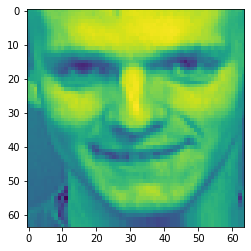

In [122]:
plt.imshow(first_picture_train_reshaped)

In [123]:
second_picture_train = data_train[1]
#get all indexes of all images of person 8
print(target_pred)


[10  7  8 24  2 16  4  5 19 10 22 24  6  9 30  7 38 15 12  1  3 10 16 26
 21 23 24 26  8 20  3  0 30 17 23 21  8  8  6 10 39 22 36  5 31 26 25  5
  7 35  6 32 26 11 34 34  9 15 10  2 15  4  7  6 16 36 12 18 18 23 17 16
 27 17 33 19 39  7  6  6 14 16 13 38  4 32 34 24 25 14 22 19 39  6 36 10
 26  6 19 26  8  9 20  5 17 17  1 23 10 27 31  2 22 29  7 23 34  0  5 24
 14 35 30 20 23 11 27 32 27 16 31  8 18  5 32 16 32  6 26 28  0 11  5 17
 10  0 12  6 28 15  2 27 17 14 17 21  9 36 28 10 17  6  1 34 24  2  4 34
 13 37 29 16 38 20 29  6 39 39 36 19 26 37 24  6 18  5 16 12 34 20 28 15
  8 24  9 30  4 18  7 19 27 36 22 29 38 17  6 21 36 16  6 17 37 25 12 36
 19 13 31 17 19  9  7 36 12  7  6  5 26 37 36 33 17 10 20 39 22 24  0 11
 23 33  5 17 17  1 11  0  8 11 13 39 32 35 25 20]


In [124]:
empty_array = []
array_length = len(target_pred)
for i in range(0,array_length):
    if target_pred[i] == 8:
        empty_array.append(i)
        
print(empty_array)


[2, 28, 36, 37, 100, 131, 192, 248]


In [125]:
picturesofperson8 = data_train[empty_array]

In [126]:
print(target_pred.shape)

(256,)


In [127]:
print(picturesofperson8)

[[0.6570248  0.677686   0.6983471  ... 0.11570248 0.11570248 0.10330579]
 [0.6818182  0.7066116  0.71900827 ... 0.11157025 0.10743801 0.10330579]
 [0.6280992  0.6446281  0.6735537  ... 0.10330579 0.10743801 0.10743801]
 ...
 [0.5413223  0.58677685 0.6404959  ... 0.09504132 0.11157025 0.11157025]
 [0.6363636  0.6528926  0.6694215  ... 0.26859504 0.24380165 0.17768595]
 [0.6694215  0.6818182  0.7066116  ... 0.11157025 0.11157025 0.10743801]]


In [128]:
print(picturesofperson8.shape)

(8, 4096)


[0.6570248  0.677686   0.6983471  ... 0.11570248 0.11570248 0.10330579]
[0.6818182  0.7066116  0.71900827 ... 0.11157025 0.10743801 0.10330579]
[0.6280992  0.6446281  0.6735537  ... 0.10330579 0.10743801 0.10743801]
[0.58677685 0.59504133 0.6818182  ... 0.11570248 0.11983471 0.10743801]
[0.6446281  0.69008267 0.70247936 ... 0.11157025 0.10743801 0.11983471]
[0.5413223  0.58677685 0.6404959  ... 0.09504132 0.11157025 0.11157025]
[0.6363636  0.6528926  0.6694215  ... 0.26859504 0.24380165 0.17768595]
[0.6694215  0.6818182  0.7066116  ... 0.11157025 0.11157025 0.10743801]
8


<Figure size 432x288 with 0 Axes>

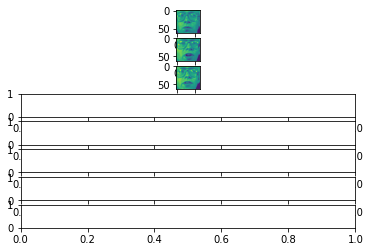

In [129]:
from matplotlib.image import imread
import matplotlib.pyplot as plt


picturesofperson8_reshaped = []
for i in range(0,len(picturesofperson8)):
    print(picturesofperson8[i])
    x = picturesofperson8[i].reshape(64, 64)
    picturesofperson8_reshaped.append(x)
print(len(picturesofperson8_reshaped))

#Aadhar Bhatt's answer
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(8,1) 
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(picturesofperson8_reshaped[0])
axarr[1].imshow(picturesofperson8_reshaped[1])
axarr[2].imshow(picturesofperson8_reshaped[2])


In [130]:

picturesofperson8_reshaped = []
for i in range(0,len(picturesofperson8)):
    print(picturesofperson8[i])
    x = picturesofperson8[i].reshape(64, 64)
    picturesofperson8_reshaped.append(x)
print(len(picturesofperson8_reshaped))

[0.6570248  0.677686   0.6983471  ... 0.11570248 0.11570248 0.10330579]
[0.6818182  0.7066116  0.71900827 ... 0.11157025 0.10743801 0.10330579]
[0.6280992  0.6446281  0.6735537  ... 0.10330579 0.10743801 0.10743801]
[0.58677685 0.59504133 0.6818182  ... 0.11570248 0.11983471 0.10743801]
[0.6446281  0.69008267 0.70247936 ... 0.11157025 0.10743801 0.11983471]
[0.5413223  0.58677685 0.6404959  ... 0.09504132 0.11157025 0.11157025]
[0.6363636  0.6528926  0.6694215  ... 0.26859504 0.24380165 0.17768595]
[0.6694215  0.6818182  0.7066116  ... 0.11157025 0.11157025 0.10743801]
8


[7, 43, 47, 103, 118, 133, 142, 185, 227, 242]
[0.55785125 0.6280992  0.677686   ... 0.446281   0.27272728 0.39256197]
[0.6322314  0.677686   0.6735537  ... 0.4876033  0.39256197 0.3140496 ]
[0.1694215  0.29338843 0.56198347 ... 0.3429752  0.36363637 0.37603307]
[0.7933884  0.7892562  0.78099173 ... 0.32231405 0.3140496  0.35950413]
[0.6735537  0.71487606 0.76033056 ... 0.41735536 0.40495867 0.36363637]
[0.6404959  0.6818182  0.71900827 ... 0.4090909  0.4214876  0.41735536]
[0.3553719  0.4090909  0.5        ... 0.2768595  0.38016528 0.42975205]
[0.77272725 0.8057851  0.79752064 ... 0.2107438  0.19008264 0.13636364]
[0.3677686  0.45454547 0.5123967  ... 0.15289256 0.1570248  0.16115703]
[0.37603307 0.4752066  0.57438016 ... 0.38016528 0.36363637 0.41735536]
10


<Figure size 432x288 with 0 Axes>

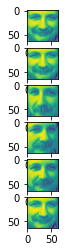

In [131]:
empty_array = []
array_length = len(target_pred)
for i in range(0,array_length):
    if target_pred[i] == 5:
        empty_array.append(i)
        
print(empty_array)

picturesofperson5 = data_train[empty_array]

from matplotlib.image import imread
import matplotlib.pyplot as plt


picturesofperson5_reshaped = []
for i in range(0,len(picturesofperson5)):
    print(picturesofperson5[i])
    x = picturesofperson5[i].reshape(64, 64)
    picturesofperson5_reshaped.append(x)
print(len(picturesofperson5_reshaped))

#Aadhar Bhatt's answer
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(6,1) 
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(picturesofperson5_reshaped[0])
axarr[1].imshow(picturesofperson5_reshaped[1])
axarr[2].imshow(picturesofperson5_reshaped[2])
axarr[3].imshow(picturesofperson5_reshaped[3])
axarr[4].imshow(picturesofperson5_reshaped[4])
axarr[5].imshow(picturesofperson5_reshaped[5])

In [132]:
def my_function():
  print("Hello from a function")

my_function()

Hello from a function


In [133]:
def my_function(fname):
  print(fname + " Refsnes")

my_function("Emil")
my_function("Tobias")
my_function("Linus")

Emil Refsnes
Tobias Refsnes
Linus Refsnes


In [134]:
def number_function(number):
    number = number + 1
    print(number)

In [135]:
number_function(10)

11


[0.1570248  0.1570248  0.15289256 ... 0.42975205 0.4338843  0.43801653]
[0.28512397 0.21900827 0.18181819 ... 0.5123967  0.2892562  0.03305785]
[0.1983471  0.23553719 0.35123968 ... 0.06198347 0.12809917 0.09090909]
[0.28512397 0.28512397 0.27272728 ... 0.30165288 0.30991736 0.3140496 ]
[0.22727273 0.32231405 0.3966942  ... 0.5041322  0.4876033  0.45041323]
5


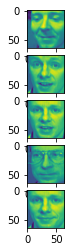

In [136]:
def olivetti_faces(personnumber):
    empty_array = []
    array_length = len(target_pred)
    for i in range(0,array_length):
        if target_pred[i] == personnumber:
            empty_array.append(i)
    picturesofpersonx = data_train[empty_array]
    picturesofpersonx_reshaped = []
    for i in range(0,len(picturesofpersonx)):
        print(picturesofpersonx[i])
        x = picturesofpersonx[i].reshape(64, 64)
        picturesofpersonx_reshaped.append(x)
    print(len(picturesofpersonx_reshaped))
    f, axarr = plt.subplots(len(picturesofpersonx),1) 
    for i in range(0, len(picturesofpersonx)):
        axarr[i].imshow(picturesofpersonx_reshaped[i])
        
olivetti_faces(2)

In [141]:
from sklearn.metrics import silhouette_score
silhouette_score(data_train, kmeans.labels_)

0.16496009

In [148]:
numberofclusters = []
silhouettescore = []

In [155]:
for i in range (5, 100, 5):
    k = i
    numberofclusters.append(k)
    kmeans = KMeans(n_clusters=k)
    target_pred = kmeans.fit_predict(data_train)
    SS = silhouette_score(data_train, kmeans.labels_)
    silhouettescore.append(SS)
    
    

In [156]:
k = 50
    kmeans = KMeans(n_clusters=k)
    target_pred = kmeans.fit_predict(data_train)
    silhouette_score(data_train, kmeans.labels_)

IndentationError: unexpected indent (1690085013.py, line 2)

In [ ]:
#create and plot the quadratic data
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.xlabel("number of clusters") 
plt.ylabel("shilhouette score") 


plt.plot(numberofclusters,silhouettescore,"b.")
plt.show()